<a href="https://colab.research.google.com/github/dacardonave/COVID-19/blob/master/COMPARACION_DE_METODOS_DE_REGRESION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis comparativo de los metodos de regresion 
## Analitica de datos
#### Daniel Cardona Velasquez
#### Universidad Nacional De Colombia.

A continuacion presentaremos un analisis comparativo de algunos metodos de regresion ya implementados por algunas librerias en python para el entrenamiento de modelos predictivo, la idea pricncipal es predecir el numero de contagiados por COVID-19 del dia siguiente en colombia. En este caso en particualar, trabajaremos en una base de datos sobre el Covd-19, previamente filtrada y depurada para su entrenamiento y analisis.

In [1]:
!pip install wget
import wget
import pandas as pd
#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
wget.download(url, 'covid.csv')
Xd = pd.read_csv('covid.csv')
Xd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


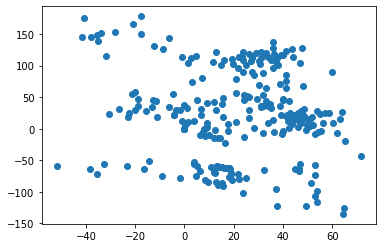

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(Xd['Lat'],Xd['Long'])

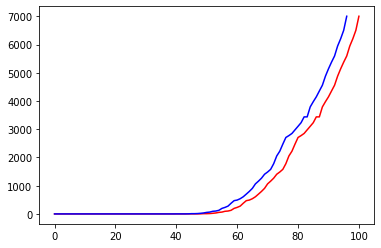

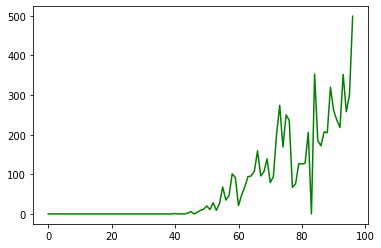

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#funcion ventaneo
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N


ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
w = 3
X,y = covid_win(serie,w=w)
X_d,y_d = covid_win(serie_d,w=w)

plt.plot(serie,'r')
plt.plot(y,'b')
plt.show()
plt.plot(y_d,'g')



# Entrenamiento de regresor para covid 19 - Colombia
# Análisis exploratorio - visualización en 2D PCA
# Validación cruzada y anidada (pocos datos)

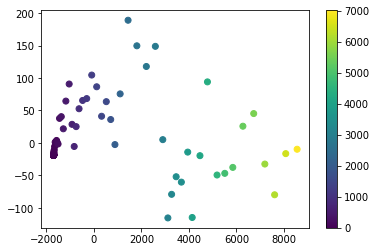

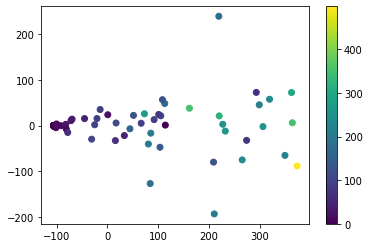

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#red = TSNE(n_components = 2,perplexity=10)
#red_d = TSNE(n_components = 2,perplexity=10)

red = PCA()
red_d = PCA()


z = red.fit_transform(X)
z_d = red_d.fit_transform(X_d)

plt.scatter(z[:,0],z[:,1],c=y)
plt.colorbar()
plt.show()


plt.scatter(z_d[:,0],z_d[:,1],c=y_d)
plt.colorbar()
plt.show()


In [5]:
red_d.explained_variance_ratio_

array([0.86636436, 0.07168599, 0.06194964])

$$w^* = (\Phi^\top \Phi + \lambda I)^{-1}\Phi^\top y $$

$$y_n = \phi_n w^*$$


$\lambda$: hyperparameter

$\Phi(x)=\mathcal{N}(x|\mu,\sigma^2)$

$\mu,\sigma$ hyperparameters

$w$: model's parameter

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
#pocos datos y mucha incertidumbre, validación cruzada anidada
Xdata, ydata = X,y
#conjunto de entrenamiento y conjunto de test 
X_train, X_test, y_train, y_test = train_test_split(Xdata,ydata,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(67, 3)
(30, 3)


In [0]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

steps = [
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', LinearRegression())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Ridge())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', Lasso())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', ElasticNet())], 
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel = 'rbf'))], #clasificador 
         

          [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel='polynomial'))], #clasificador 
         

           [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel='sigmoid'))] #clasificador 
         
         ]  

#parametros a buscar por busqueda por grilla
parameters =[
             {'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__fit_intercept':[0.5,1,1.5,2,2.5,3],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

              {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'reg__l1_ratio':[5e-3,5e-2,5e-1,5,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },

             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },


             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },


             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9,1,2,3]
             },
              ]

label_model = ['NorSC-PCA-LM', 'NorSC-PCA-LMRidge', 'NoSC-PCA-LMLasso', 'NorSC-PCA-LMEN', 'NorSC-PCA-KRRBF', 'NorSC-PCA-KRPoly', 'NorSC-PCA-KRSig']


In [8]:
#valildacion cruzada anidada
Niter = 10 #numero particiones outter loop nested cross-validation
maev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 
#############################
for j in range(Niter): #outter loop
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=10,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          maev[j,r] = mae(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('mae:',maev[j,r])
                
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros

      savedata = {
          'acc':maev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            } 

      dump(savedata,'covid19_1.joblib')



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1967s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done  32 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0587s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0547s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0874s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  98 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 152 out of 180 | elapsed:    2.8s remaining:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    2.8s finished
[Parallel(n_jobs=5)

it 1/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 51.554988980464906
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  54 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 182 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 270 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 358 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 462 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1934s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 566 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 782 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 1007 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0086s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs

it 1/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 51.29206313559602
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1101s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0905s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0449s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computatio

it 1/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 3}
mae: 51.517658749075544
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0902s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0170s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jo

it 1/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}
mae: 55.886406138777296
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0672s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1691s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.01, 'rep__n_components': 2}
mae: 56.01871336362092
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0125s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0927s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1047s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1481s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.6s

it 1/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 45.04204148623539
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1727s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 102 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 174 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 262 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 350 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 454 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 558 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 678 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 798 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 934 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1071 out of 1080 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    4.0s finished
/usr/local/lib/python3.6/dist-pa

it 1/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 42.28377691106191
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1786s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 133 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 44.44216695559734
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0124s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0399s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1042s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1135s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1728s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 986 tasks   

it 2/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 44.62620390741027
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0749s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1077s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0072s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 2/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 3}
mae: 44.42251798590584
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0442s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0579s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1274s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parall

it 2/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}
mae: 51.893329855549105
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0548s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0858s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1416s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5

it 2/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae: 41.20449532215944
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0750s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1919s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 2/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 27.707697473282224
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0093s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0261s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0565s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  72 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 224 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 312 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 416 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 520 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 640 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 760 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: 

it 2/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 32.61355459138516
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0706s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1772s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 122 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0119s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0435s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0870s.) Setting batch_size=8.


it 3/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 51.57320974827332
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1284s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0086s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0086s.) Setting batch_si

it 3/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 51.739424208087335
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1714s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  66 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 124 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 140 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 151 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 3/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 2}
mae: 51.578148395403225
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0136s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0585s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0717s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1145s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.3s

it 3/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}
mae: 59.24127917559133
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1037s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1756s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 3/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}
mae: 44.95204167998236
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1064s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0859s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 306 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 658 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 866 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 969 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1029 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1044 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1061 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 3/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 2}
mae: 44.64554302503445
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1332s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1213s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: S

it 3/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}
mae: 46.40112505114921
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0290s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0840s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 134 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 143 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0150s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0550s.)

it 4/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 39.0842530695268
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1010s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0095s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_job

it 4/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 39.45885013703188
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0837s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0874s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0143s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0353s.) Setting batch_size=4.


it 4/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 2}
mae: 39.096761151673604
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0778s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1308s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    5.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 4/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}
mae: 49.382665291322226
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0454s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0856s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  48 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1469s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 128 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 272 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 416 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 592 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 768 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1934s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 962 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done 988 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 1018 tasks      | elapsed:    5.4s
[Parallel(n_jobs=5)]: Done 1048 tasks      | elapsed:    5.

it 4/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae: 36.514360100169206
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0858s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1818s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.8s finished


it 4/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 31.111716229724454
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0072s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0072s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0723s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1292s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 306 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 482 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 658 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 866 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 984 tasks      | ela

it 4/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}
mae: 40.49888397121237
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0637s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0992s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  98 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 121 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 130 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 155 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0105s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0740s.)

it 5/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 48.72622128462121
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0463s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1365s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0108s.) Setting batch_s

it 5/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 49.21494393359594
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  41 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1481s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  98 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0151s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s


it 5/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 2}
mae: 48.74320674204081
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0538s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0678s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1416s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5

it 5/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}
mae: 59.793529398724914
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0863s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0936s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0085s.) Setting batch_s

it 5/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}
mae: 49.34669080449252
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1019s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1012s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 178 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 322 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 498 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 674 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 882 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 970 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1015 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1045 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1062 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.8s finished
[Parallel(n_jobs=5)]: Using 

it 5/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 38.39258648155792
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0733s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1217s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1807s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 178 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 354 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 706 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 913 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 981 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1020 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1071 out of 1080 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/l

it 5/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}
mae: 37.056956245173204
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0103s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0522s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0697s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1280s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Ba

it 6/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 55.75447067523642
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0578s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0608s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0935s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1929s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    

it 6/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 55.6513435003872
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1377s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 147 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0422s.) Setting batch_size=4.


it 6/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 3}
mae: 55.7451722454169
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0839s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1447s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.4s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 6/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}
mae: 55.65916634181449
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0985s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1615s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jo

it 6/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.01, 'rep__n_components': 2}
mae: 47.801218757416
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0608s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1751s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1748s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 162 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 322 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 674 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 881 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 949 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1017 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1071 out of 1080 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3

it 6/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.01, 'rep__n_components': 3}
mae: 44.55729146995133
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0243s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0614s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0802s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1367s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.7s

it 6/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}
mae: 29.189830884898857
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0111s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0111s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0321s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1059s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  98 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 144 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 155 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | ela

it 7/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 40.94347164451665
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1024s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1291s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1750s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 7/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 41.10576576033953
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0550s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1117s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0147s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0405s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks  

it 7/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 2}
mae: 40.948528088983515
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1021s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1893s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0225s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 7/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}
mae: 46.398316433647366
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0661s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1485s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_job

it 7/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}
mae: 39.54512603846536
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0573s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  32 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1443s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  96 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1982s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 180 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 316 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 524 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 732 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 957 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1017 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1049 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1066 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5

it 7/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 37.015456899124544
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0612s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1919s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares s

it 7/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 3}
mae: 35.24878709742916
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0117s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0117s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0360s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1604s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 130 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0092s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=

it 8/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 46.51407609408298
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1240s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1828s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0103s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 8/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 3}
mae: 47.09166127852883
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1372s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0087s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0524s.) Setting batch_size=4.


it 8/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 3}
mae: 46.534168627848615
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1086s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1346s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1856s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 870 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 926 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.3s finished


it 8/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 3}
mae: 57.997561026710414
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0188s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0647s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0660s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1172s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1859s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Don

it 8/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae: 45.239740116858535
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0114s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0114s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0480s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1727s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  66 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 146 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 290 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 466 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 642 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 850 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 968 tasks      | ela

it 8/10-Modelo 6/7
best hyper {'reg__alpha': 0.1, 'reg__gamma': 10, 'rep__n_components': 3}
mae: 52.781409720832066
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1260s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1547s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: S

it 8/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 42.57837840029182
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0187s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0348s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0830s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1343s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Ba

it 9/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 38.47703655807724
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.1067s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0859s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0162s.) Setting batch_s

it 9/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 39.09741918865781
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0781s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0908s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0100s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0577s.) Setting batch_size=4.


it 9/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 2}
mae: 38.49541491145863
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1035s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1465s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1894s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 930 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 986 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent wo

it 9/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}
mae: 51.47856840495898
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1522s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 993 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1038 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0156s.) Setting batch_si

it 9/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}
mae: 40.96729158282178
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0740s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0833s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1667s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 194 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 386 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 738 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 916 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 984 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1071 out of 1080 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3

it 9/10-Modelo 6/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 31.70053505531687
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0823s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1124s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1649s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1023 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5

it 9/10-Modelo 7/7
best hyper {'reg__alpha': 0.01, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 42.99683906682828
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0072s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0401s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0496s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0467s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 140 tasks      | ela

it 10/10-Modelo 1/7
best hyper {'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 39.03598374467171
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0598s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0545s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1539s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1760s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    2.9

it 10/10-Modelo 2/7
best hyper {'reg__alpha': 0.001, 'reg__fit_intercept': 0.5, 'rep__n_components': 2}
mae: 38.99568778497713
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0671s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1284s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0166s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0246s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computatio

it 10/10-Modelo 3/7
best hyper {'reg__alpha': 0.001, 'rep__n_components': 2}
mae: 39.03505026789033
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1250s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1740s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 694 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 900 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 956 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1016 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0127s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  

it 10/10-Modelo 4/7
best hyper {'reg__alpha': 0.001, 'reg__l1_ratio': 0.5, 'rep__n_components': 2}
mae: 44.823426117150156
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0854s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1216s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 502 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 710 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 918 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 1008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1053 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1070 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1080 out of 1080 | elapsed:    3.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 10/10-Modelo 5/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 2}
mae: 41.29663597587399
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0080s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0618s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0686s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  54 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0516s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 110 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1476s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 214 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 470 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 822 tasks   

it 10/10-Modelo 6/7
best hyper {'reg__alpha': 0.01, 'reg__gamma': 10, 'rep__n_components': 2}
mae: 51.71806521292184
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0097s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0466s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0825s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  86 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 246 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 334 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 438 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 542 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 662 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1969s.) Setting batch_size=16.


it 10/10-Modelo 7/7
best hyper {'reg__alpha': 0.001, 'reg__gamma': 1, 'rep__n_components': 0.5}
mae: 38.026905058095934


Por Niter de outter loop tengo valores de los hyperparameters

$$\gamma = [0.01,0.1,10,1000,10000,0.01]$$

$$\gamma = [0.01,0.01,0.01,0.1,1,0.01]$$

$$\gamma^* = moda/mediana(\gamma_i) = 0.01$$

Tomo todos los datos, entreno sobre todo el conjunto con los parametros encontrados utilizando validación cruzada anidad

$$\theta^*/w^* =f(X|\gamma^*)$$

$$ y_{new} = f(x_{new}|\gamma^*,\theta^*/w^*)$$

### A continuacion se puede ver un grafico comparativo de los errores de todos los modelos y con el se puede decidir cual es el modelo mas acertado.

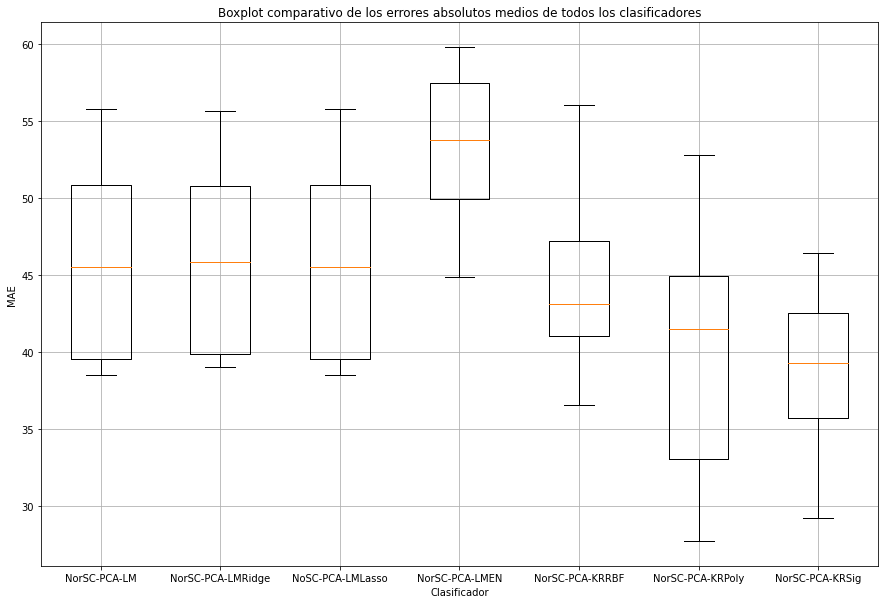

In [9]:
#Comparacion de los errores medios absolutos de todos los clasificadores
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.boxplot(maev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=label_model)
plt.xlabel("Clasificador")
plt.ylabel("MAE")
plt.title("Boxplot comparativo de los errores absolutos medios de todos los clasificadores")
plt.grid()
plt.show()

### Luego de ver el grafico comparativo de los errores de los modelos vamos a entrenar un modelo para cada uno de los regresores con los mejores parametros encontrados por el GridSerchCV, se mostrara cuales fueron esos parametros y posteriormente se hara una prediccion de contagiados por COVID-19 al dia siguiente con cada uno de ellos. Al final podremos comparar sus predicciones y cual es la mas acertada.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


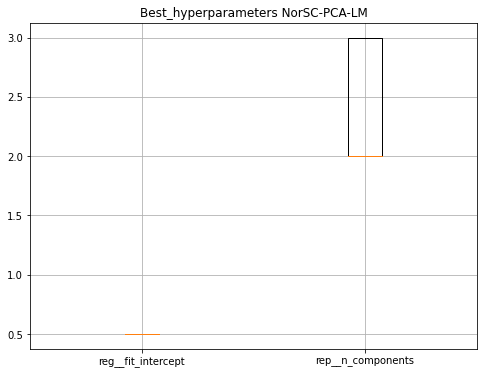

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Modes=  [0.5 2. ]


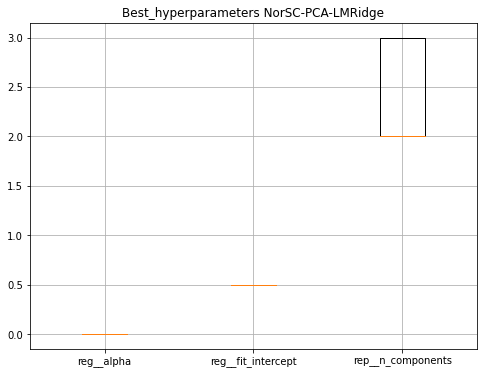

Modes=  [1.e-03 5.e-01 2.e+00]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


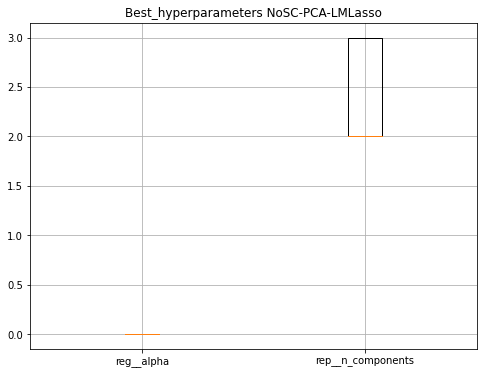

Modes=  [1.e-03 2.e+00]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


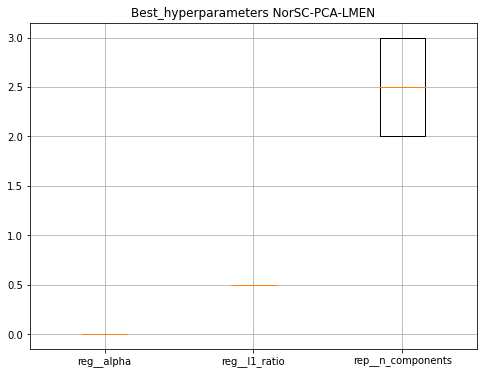

Modes=  [1.e-03 5.e-01 2.e+00]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


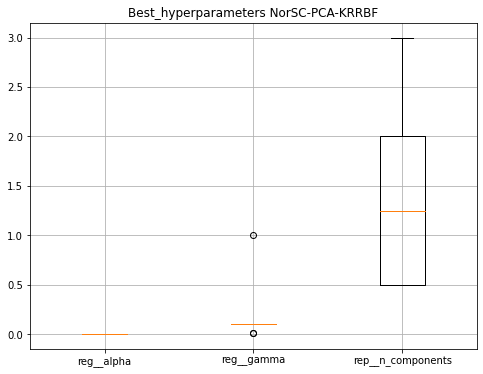

Modes=  [0.001 0.1   0.5  ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


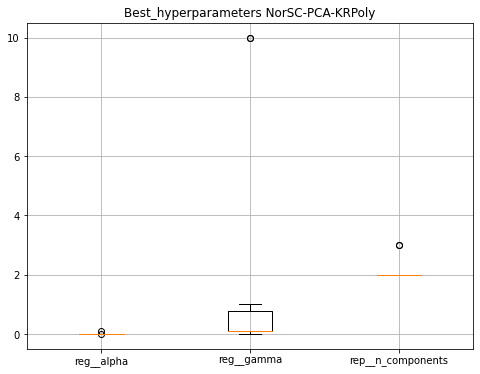

Modes=  [1.e-03 1.e-01 2.e+00]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


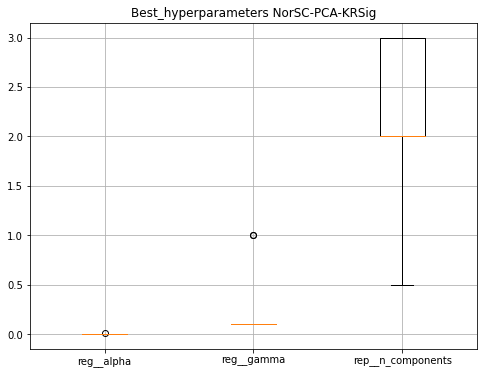

Modes=  [1.e-03 1.e-01 2.e+00]


In [26]:
## Mejores parametros por modelo

from scipy.stats import mode
from datetime import date



for q in range (0,len(steps)):

  r = q #hyperparameters model q
  nh = len(best_hyperpar[0][r])
  hyperpar_r = np.zeros((Niter,nh)) 
  for i in range(Niter):
    for j in range(nh):
      hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])


  #revisar numero entero para realizar casting
  aa = list(best_hyperpar[0][r].keys())
  c = -1
  for i in range(len(aa)):
      if aa[i].find('n_components') > -1:
        c = i

  plt.figure(figsize=[8,6])
  plt.boxplot(hyperpar_r)
  plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
  plt.title('Best_hyperparameters '+label_model[r])
  plt.subplot()
  plt.grid()
  plt.show()

  mode_hyper = mode(hyperpar_r,axis=0)[0][0]
  print("Modes= ", mode_hyper)


 

Predicción contagiados covid19  2020-05-02 con el modelo NorSC-PCA-LM = [7671.95827573]


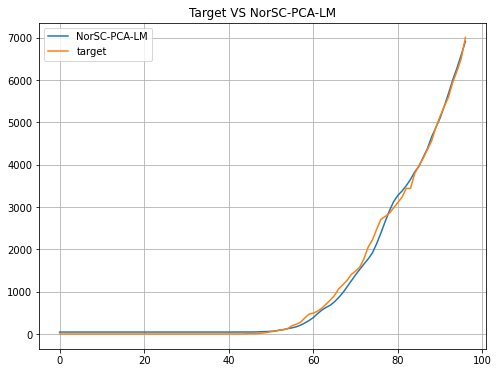

Predicción contagiados covid19  2020-05-02 con el modelo NorSC-PCA-LMRidge = [7775.09160465]


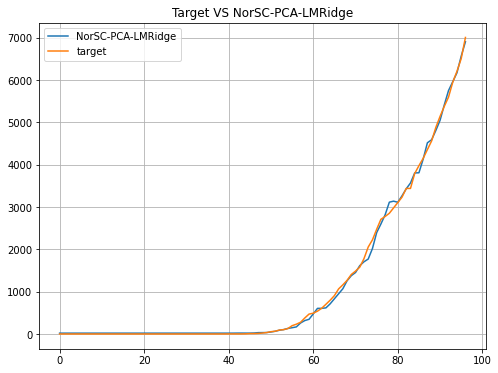

Predicción contagiados covid19  2020-05-02 con el modelo NoSC-PCA-LMLasso = 7671.956259163704


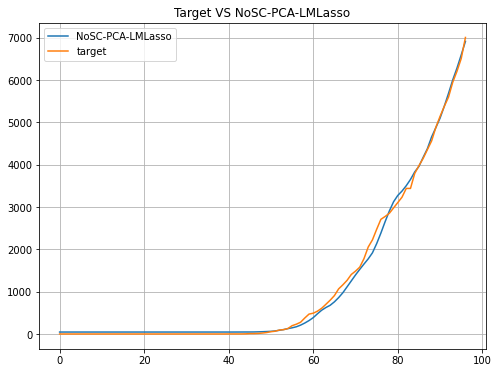

Predicción contagiados covid19  2020-05-02 con el modelo NorSC-PCA-LMEN = 7723.760588094943


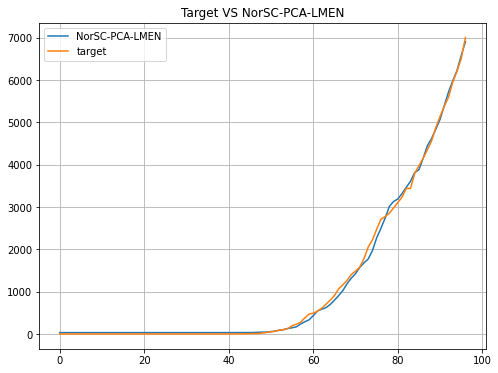

Predicción contagiados covid19  2020-05-02 con el modelo NorSC-PCA-KRRBF = [6598.31263505]


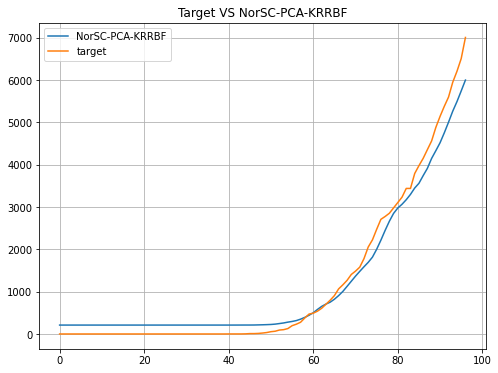

Predicción contagiados covid19  2020-05-02 con el modelo NorSC-PCA-KRPoly = [7047.76427498]


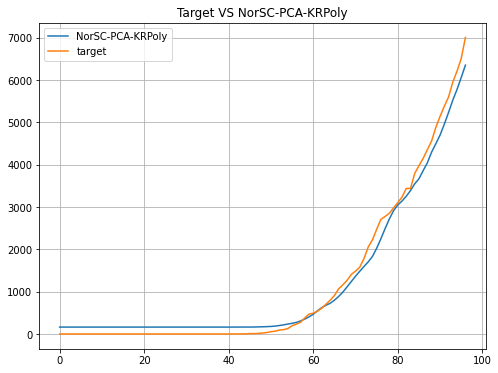

Predicción contagiados covid19  2020-05-02 con el modelo NorSC-PCA-KRSig = [4719.80557572]


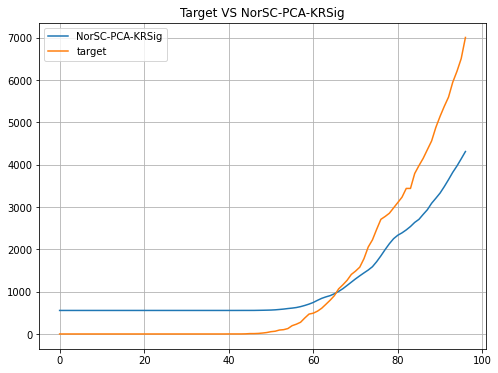

In [27]:
# Entrenamiento y prdiccion con todos los modelos
for q in range (0,len(steps)):
  r = q
  #entrenar con mejores hyperparametros
  model_f = Pipeline(steps[r])
  paramsf = parameters[r]
  hyperl = list(parameters[r].keys())
  nh = len(hyperl)
  for j in range(nh):
    if j ==c:
      paramsf[hyperl[j]] = int(mode_hyper[j])
    else:
      paramsf[hyperl[j]] = mode_hyper[j]
      
  model_f.set_params(**paramsf)
  model_f.fit(Xdata,ydata) #entrenar con todos los datos porque no tenemos suficientes > 10000 entrenar xtrain de lo contrario con todo el dataset

  print('Predicción contagiados covid19 ',date.today(),'con el modelo', label_model[r], '=',model_f.predict(serie[len(serie)-w:].reshape(1,-1))[0])


  #curva predicción sobre modelo  final
  plt.figure(figsize=[8,6])
  plt.plot(model_f.predict(Xdata),label=label_model[r])
  plt.plot(ydata,label='target')
  plt.title('Target VS '+label_model[r])
  plt.grid()
  plt.legend()
  plt.show()

In [0]:
'''
#tsne con mapeo
from sklearn.metrics import pairwise_distances

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

red = TSNE(n_components = 2,perplexity=10)
z = red.fit_transform(X_train)
ww=4
hh=4
plt.figure(figsize=(ww,hh))
plt.scatter(z[:,0],z[:,1],c=y_train)
plt.colorbar()
plt.title('tsne 2D')
plt.show()
Dx = pairwise_distances(X_train,X_train)
plt.figure(figsize=(ww,hh))
plt.imshow(Dx)
plt.colorbar()
plt.title('$D_X$')
plt.show()
Dz = pairwise_distances(z,z)
plt.figure(figsize=(ww,hh))
plt.imshow(Dz)
plt.colorbar()
plt.title('$D_z$')
plt.show()
#ind = np.argsort(D,axis=0)
'''




$$z_{new} = \sum_{n=1}^K w_{n,new} z_n; \quad z_n \in \Omega_{new}$$

$$\Omega_{new} \in \mathbb{R} ^{K \times P}$$ los K-vecinos mas cercanos de $x_{new}$ en  $X_{train}$

$$ \sum_{n=1}^K w_{n,new}=1$$, preservar noción de probabilidad, combianción lineal convexa.

$$w_{n,new} = \frac{\exp\left(-\frac{\|x_n - x_{new}\|^2_2}{2\sigma^2}\right)}{\sum_{n'=1}^K w_{n',new}}$$



In [0]:
'''
xnew = X_test[0].reshape(1,-1)
ynew = y_test[0]
#znew = ?
dnew = pairwise_distances(xnew,X_train)
#knn-> buscar k instancias mas cercanas de xnew en X_train, y generar una combinacion de ellos para mapear a z 
sig = 10000
kk = 5
knew = np.exp(-dnew**2/(2*sig**2))
ind = np.argsort(knew)[::-1]
wnew = knew[0,ind[0,:kk]]
wnew /= sum(wnew)
wnew

znew = z[]
'''

$$y_{new}=reg(red(scaler(x_{new})))$$

fit: entrenamiento, ajuste, aprende los parámetros utilizando los hyperparámetros fijados

Ej: red = PCA(n_components = 0.9); n_components hyperparameter

$$W^*=\arg \max_W W^\top X^\top X W\\
\quad \rm{s.t.} \quad W^\top W = I$$

$$ red(scaler(x_{new})) = scaler(x_{new})W$$ mapeo de PCA

mapeo - operacion: transformacion y predicción. Predicción es la última etapa en steps -> regresor

transformacion: scaler y rep (PCA)

Si mi modelo no tiene transformacion, no puedo utilizarlo en nuevos datos

Utilizar regresor: por vecindad -> KNN, K- nearest neighbors

In [0]:
'''
from sklearn.neighbors import KNeighborsRegressor

red = TSNE(n_components = 2,perplexity=10)
z_train = red.fit_transform(X_train)

neigh = KNeighborsRegressor(n_neighbors=3) 
neigh.fit(X_train, z_train) #entrene
z_test = neigh.predict(X_test) #evaluar -> transform o predict
z_test.shape


ww=4
hh=4
plt.figure(figsize=(ww,hh))
plt.scatter(z_train[:,0],z_train[:,1],c=y_train)
plt.scatter(z_test[:,0],z_test[:,1],c=y_test,s=200,marker='d')
plt.colorbar()
plt.title('tsne 2D')
plt.show()
'''